In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso

In [2]:
with open("./zhengqi_train.txt") as fr:
    train_data = pd.read_csv(fr, sep="\t")
with open("./zhengqi_test.txt") as fr_test:
    test_data = pd.read_csv(fr_test, sep="\t")

In [3]:
# 查看是否有数据缺失
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
V0        2888 non-null float64
V1        2888 non-null float64
V2        2888 non-null float64
V3        2888 non-null float64
V4        2888 non-null float64
V5        2888 non-null float64
V6        2888 non-null float64
V7        2888 non-null float64
V8        2888 non-null float64
V9        2888 non-null float64
V10       2888 non-null float64
V11       2888 non-null float64
V12       2888 non-null float64
V13       2888 non-null float64
V14       2888 non-null float64
V15       2888 non-null float64
V16       2888 non-null float64
V17       2888 non-null float64
V18       2888 non-null float64
V19       2888 non-null float64
V20       2888 non-null float64
V21       2888 non-null float64
V22       2888 non-null float64
V23       2888 non-null float64
V24       2888 non-null float64
V25       2888 non-null float64
V26       2888 non-null float64
V27       2888 non-null float

In [4]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [5]:
X = train_data.drop("target", axis=1)
y = train_data.target

In [7]:
X.drop(["V5","V9","V11","V17","V22","V28"],axis=1,inplace=True)

In [6]:
X

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028
5,0.445,0.627,0.408,0.220,0.458,-1.056,-1.009,-1.896,0.481,-2.114,...,1.296,0.454,0.674,0.358,0.618,-0.843,-0.290,0.364,-0.191,-0.883
6,0.889,0.416,0.640,0.356,0.224,-0.893,-0.812,-1.823,0.729,-2.114,...,2.150,0.454,0.081,0.243,0.468,-0.843,-0.290,0.364,-0.155,-1.318
7,0.984,0.529,0.704,0.438,0.258,-0.917,-0.682,-1.721,0.753,-2.114,...,2.153,0.139,-0.050,0.428,-0.119,-0.843,-0.290,0.364,0.100,-0.899
8,0.948,0.850,0.584,0.459,0.591,-0.523,-0.591,-1.524,0.763,-2.114,...,0.511,0.188,0.467,0.597,-0.057,-0.843,-0.290,0.364,0.053,-0.553
9,1.157,1.055,0.638,0.617,1.483,-0.731,-0.612,-1.524,0.968,-2.114,...,0.511,0.860,0.456,0.916,0.039,-0.843,-0.290,0.364,0.151,-1.157


In [8]:
pd.DataFrame(y)

,target
0,0.175
1,0.676
2,0.633
3,0.206
4,0.384
5,0.060
6,0.415
7,0.609
8,0.981
9,0.818


In [9]:
def find_outliers(model, X, y, sigma=3):
    # 查找离群值
    # 标准偏差预先已知的情况
    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X, y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid) / std_resid
    outliers = z[abs(z) > sigma].index
    
    # print and plot the results
    print('R2 =', model.score(X, y))
    print('mse =', mean_squared_error(y, y_pred))
    print('---------------------------------------')
    
    print('mean of residuals:', mean_resid)
    print('std of residuals:', std_resid)
    print('---------------------------------------')
    
    print(len(outliers), 'outliers: ')
    print(outliers.tolist())
    
    plt.figure(figsize=(15, 5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y, y_pred, '.')
    plt.plot(y.loc[outliers], y_pred.loc[outliers], 'ro')
    # loc[1]是DataFrame的行索引, loc[1,2]是行列索引
    # o表示小圆圈，ro表示红色小圆圈
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred')
    
    ax_132 = plt.subplot(1,3,2)
    plt.plot(y, y - y_pred, '.')
    plt.plot(y.loc[outliers], y.loc[outliers] - y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred')
    
    ax_133 = plt.subplot(1,3,3)
    z.plot.hist(bins=50, ax=ax_133)
    z.loc[outliers].plot.hist(color='r', bins=50, ax=ax_133)
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('z')
    
    plt.show()
    
    return outliers

R2 = 0.8853726563655815
mse = 0.11094244665696637
---------------------------------------
mean of residuals: -4.982164265630896e-17
std of residuals: 0.3331379217948056
---------------------------------------
33 outliers: 
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1523, 1537, 1704, 1874, 1879, 1905, 1979, 2002, 2159, 2160, 2264, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]


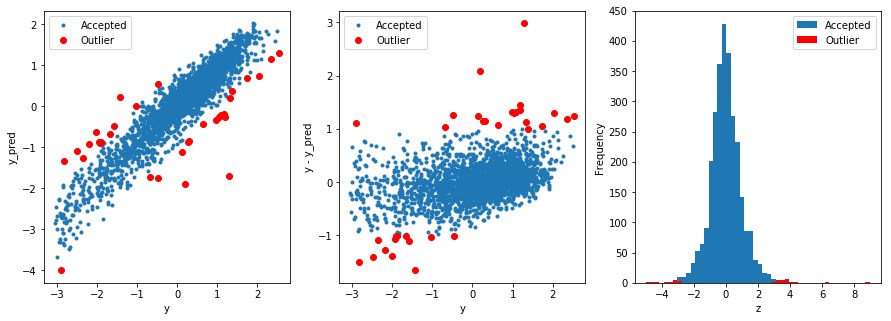

In [10]:
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=100)

outliers = find_outliers(Ridge(), X, y)

X_outliers = X.loc[outliers]
y_outliers = y.loc[outliers]
X_t = X.drop(outliers)
y_t = y.drop(outliers)

In [11]:
scaler = StandardScaler()
scaler.fit(X_t)
X_t = pd.DataFrame(scaler.transform(X_t), columns=X_t.columns)

In [12]:
X_t.shape, y_t.shape

((2855, 32), (2855,))

In [13]:
X_t.describe()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V27,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,2.855000e+03,2.855000e+03,2.855000e+03,2855.000000,2.855000e+03,2.855000e+03,2.855000e+03,2.855000e+03,2.855000e+03,2.855000e+03,...,2.855000e+03,2855.000000,2.855000e+03,2.855000e+03,2855.000000,2.855000e+03,2.855000e+03,2855.000000,2.855000e+03,2855.000000
mean,-1.991013e-17,-1.991013e-17,-1.991013e-17,0.000000,-1.991013e-17,-5.973039e-17,3.982026e-17,1.991013e-17,1.991013e-17,1.991013e-17,...,1.991013e-17,0.000000,7.466298e-18,-1.991013e-17,0.000000,9.955065e-18,1.991013e-17,0.000000,3.484273e-17,0.000000
std,1.000175e+00,1.000175e+00,1.000175e+00,1.000175,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,...,1.000175e+00,1.000175,1.000175e+00,1.000175e+00,1.000175,1.000175e+00,1.000175e+00,1.000175,1.000175e+00,1.000175
min,-4.836807e+00,-5.532023e+00,-4.097688e+00,-4.024480,-5.377627e+00,-5.231815e+00,-5.444146e+00,-5.482340e+00,-2.735338e+00,-5.825419e+00,...,-5.341653e+00,-2.858530,-5.136632e+00,-6.952963e+00,-4.567776,-4.607075e+00,-4.794848e+00,-6.004498,-2.757317e+00,-3.453582
25%,-4.405845e-01,-2.934251e-01,-6.627085e-01,-0.604967,-4.440443e-01,-5.435025e-01,-4.367451e-01,-3.801255e-01,-4.648239e-01,-4.972972e-01,...,-4.170977e-01,-0.721053,-3.831095e-01,-3.517987e-01,-0.481193,-5.051853e-01,-2.976079e-01,-0.407959,-4.609861e-01,-0.657357
50%,2.515038e-01,2.261670e-01,1.043578e-01,0.028927,1.078978e-01,2.246143e-01,2.369129e-01,2.022780e-01,1.281196e-01,1.096756e-01,...,1.882587e-01,-0.109599,-6.988000e-03,1.926452e-01,0.015287,-4.908858e-02,1.522161e-01,0.165902,1.074851e-01,-0.054637
75%,6.457450e-01,5.750513e-01,6.883429e-01,0.709317,6.027813e-01,7.077756e-01,6.988347e-01,6.109723e-01,6.057105e-01,6.611121e-01,...,6.246352e-01,0.613979,4.860741e-01,5.816993e-01,0.592928,4.472520e-01,2.651719e-01,0.408277,6.336733e-01,0.615271
max,2.155559e+00,1.979124e+00,2.793226e+00,2.601699,3.018446e+00,1.873951e+00,1.893932e+00,2.317145e+00,5.004244e+00,2.950443e+00,...,2.416564e+00,4.260375,2.954758e+00,2.175604e+00,2.650493,5.421091e+00,5.100280e+00,2.161938,3.485947e+00,3.097292


In [14]:
y_t.values

array([0.175, 0.676, 0.633, ..., 0.005, 0.35 , 0.417])

In [20]:
# 查找最佳迭代次数
param_test1 = {'n_estimators': range(64, 67, 1)}
gsearch1 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, max_depth=18,
                                                            min_samples_leaf=18, min_samples_split=160,
                                                            subsample=0.9, max_features=1),
                        param_grid = param_test1, scoring='neg_mean_squared_error',
                        iid=False, cv=5, return_train_score=True)

gsearch1.fit(X_t, y_t.values)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
# best n_estimators = 65
# score: 0.12283998697923146

({'mean_fit_time': array([0.06180367, 0.06200366, 0.06320376]),
  'std_fit_time': array([0.00172051, 0.00063256, 0.00097987]),
  'mean_score_time': array([0.00240002, 0.00200019, 0.00240011]),
  'std_score_time': array([4.89901382e-04, 1.16800773e-07, 4.89823515e-04]),
  'param_n_estimators': masked_array(data=[64, 65, 66],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 64}, {'n_estimators': 65}, {'n_estimators': 66}],
  'split0_test_score': array([-0.11411415, -0.11488025, -0.10897081]),
  'split1_test_score': array([-0.17362723, -0.15598513, -0.16096449]),
  'split2_test_score': array([-0.10557632, -0.12285414, -0.11084702]),
  'split3_test_score': array([-0.14567083, -0.14053968, -0.15824315]),
  'split4_test_score': array([-0.13661636, -0.13373563, -0.13797426]),
  'mean_test_score': array([-0.13512098, -0.13359897, -0.13539995]),
  'std_test_score': array([0.0241265 , 0.01424903, 0.02228601]),
  'rank_

In [21]:
# 查找最佳决策树深度
param_test2 = {'max_depth': range(16, 20, 1), 'min_samples_split': range(160, 201, 10)}
gsearch1 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,
                                                            n_estimators=65,
                                                            subsample=0.9,
                                                            min_samples_leaf=18,
                                                            random_state=10),
                        param_grid = param_test2, scoring='neg_mean_squared_error',
                        iid=False, cv=5, return_train_score=True)

gsearch1.fit(X_t, y_t.values)
gsearch1.best_params_, gsearch1.best_score_
# best max_depth=17, min_samples_split=180
# score: 0.10998219758197025

({'mean_fit_time': array([0.73724217, 0.7280416 , 0.72304134, 0.70164013, 0.69083948,
         0.75104303, 0.73704219, 0.72704148, 0.71224074, 0.69903998,
         0.75804329, 0.74864273, 0.73904219, 0.72344136, 0.71644101,
         0.76764407, 0.75424314, 0.73984237, 0.72384143, 0.71324091]),
  'std_fit_time': array([0.01068525, 0.01234572, 0.01195051, 0.01323098, 0.01430333,
         0.00977805, 0.01245864, 0.01283821, 0.00793518, 0.01178195,
         0.01374105, 0.01219251, 0.01590061, 0.01682469, 0.01576921,
         0.00697458, 0.01931337, 0.0116178 , 0.01466235, 0.01014746]),
  'mean_score_time': array([0.00220013, 0.00200005, 0.00220008, 0.00220013, 0.00220008,
         0.00220013, 0.00280018, 0.00200019, 0.00240011, 0.00220013,
         0.00260005, 0.00260019, 0.00220008, 0.00260019, 0.00280018,
         0.0026    , 0.00260024, 0.00240011, 0.00220017, 0.00220013]),
  'std_score_time': array([4.00066404e-04, 9.53674316e-08, 3.99971008e-04, 4.00066404e-04,
         3.99971008e-04

In [23]:
param_test3 = {'min_samples_split': range(140, 201, 10), 'min_samples_leaf': range(12, 20, 1)}
gsearch1 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,
                                                            n_estimators=65,
                                                            max_depth=17,
                                                            subsample=0.9,
                                                            random_state=10),
                        param_grid = param_test3, scoring='neg_mean_squared_error',
                        iid=False, cv=5, return_train_score=True)

gsearch1.fit(X_t, y_t.values)
gsearch1.best_params_, gsearch1.best_score_
# best min_samples_leaf=15, min_samples_split=160
# score: 0.10974906605997245

({'min_samples_leaf': 15, 'min_samples_split': 160}, -0.10974906605997245)

In [25]:
param_test4 = {'max_features': range(13, 17, 1)}
gsearch1 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,
                                                            n_estimators=65,
                                                            max_depth=17,
                                                            subsample=0.9,
                                                            random_state=10,
                                                            min_samples_leaf=15,
                                                            min_samples_split=160),
                        param_grid = param_test4, scoring='neg_mean_squared_error',
                        iid=False, cv=5, return_train_score=True)

gsearch1.fit(X_t, y_t.values)
gsearch1.best_params_, gsearch1.best_score_
# best max_features = 14
# score: 0.10861539911024576

({'max_features': 14}, -0.10861539911024576)

In [31]:
param_test5 = {'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]}
gsearch1 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,
                                                            n_estimators=65,
                                                            max_depth=17,                                                            
                                                            random_state=10,
                                                            min_samples_leaf=15,
                                                            min_samples_split=160,
                                                            max_features=14),
                        param_grid = param_test5, scoring='neg_mean_squared_error',
                        iid=False, cv=5, return_train_score=True)

gsearch1.fit(X_t, y_t.values)
gsearch1.best_params_, gsearch1.best_score_
# best subsample = 0.9
# score: 0.10861539911024576

({'subsample': 0.9}, -0.10861539911024576)

In [32]:
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=65, max_depth=17,
                                 min_samples_leaf=15, min_samples_split=160,
                                 subsample=0.9, max_features=14)
gbm1.fit(X_t, y_t.values)
mean_squared_error(y_t.values, gbm1.predict(X_t))

0.031026926334812386

In [33]:
gbm2 = GradientBoostingRegressor(learning_rate=0.05, n_estimators=130, max_depth=17,
                                 min_samples_leaf=15, min_samples_split=160,
                                 subsample=0.9, max_features=14)
gbm2.fit(X_t, y_t.values)
mean_squared_error(y_t.values, gbm2.predict(X_t))

0.030457644277128288

In [34]:
gbm3 = GradientBoostingRegressor(learning_rate=0.01, n_estimators=650, max_depth=17,
                                 min_samples_leaf=15, min_samples_split=160,
                                 subsample=0.9, max_features=14)
gbm3.fit(X_t, y_t.values)
mean_squared_error(y_t.values, gbm3.predict(X_t))

0.029909696810775314

In [35]:
gbm4 = GradientBoostingRegressor(learning_rate=0.005, n_estimators=1300, max_depth=17,
                                 min_samples_leaf=15, min_samples_split=160,
                                 subsample=0.9, max_features=14)
gbm4.fit(X_t, y_t.values)
mean_squared_error(y_t.values, gbm4.predict(X_t))

0.02979947142859411

In [36]:
gbm5 = GradientBoostingRegressor(learning_rate=0.001, n_estimators=6500, max_depth=17,
                                 min_samples_leaf=15, min_samples_split=160,
                                 subsample=0.9, max_features=14)
gbm5.fit(X_t, y_t.values)
mean_squared_error(y_t.values, gbm5.predict(X_t))

0.029836797941917133

In [37]:
gbm6 = GradientBoostingRegressor(learning_rate=0.0005, n_estimators=13000, max_depth=17,
                                 min_samples_leaf=15, min_samples_split=160,
                                 subsample=0.9, max_features=14)
gbm6.fit(X_t, y_t.values)
mean_squared_error(y_t.values, gbm6.predict(X_t))

0.029840506711267086

In [38]:
feature_importance_df = pd.DataFrame(columns=['Feature', 'importance'])
feature_importance_df.Feature = X_t.columns
feature_importance_df.importance = gbm4.feature_importances_

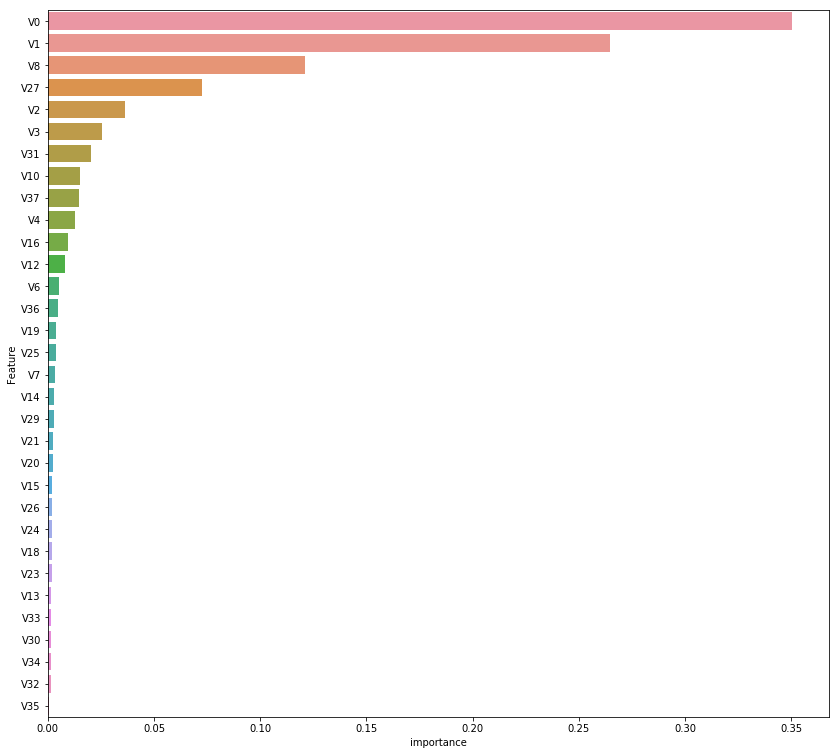

In [39]:
plt.figure(figsize=(14, 13))
sns.barplot(x="importance", y="Feature", data=feature_importance_df.sort_values(by="importance", ascending=False))
plt.show()

In [42]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=13, min_samples_split=23, min_samples_leaf=6),  
                        loss='square', learning_rate=1.0, n_estimators=700, random_state=1)

In [45]:
ada.fit(X_t, y_t.values)
mean_squared_error(y_t.values, ada.predict(X_t))

0.0143470720423894

In [43]:
test_data.drop(["V5","V9","V11","V17","V22","V28"],axis=1,inplace=True)
test_data = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns)

In [46]:
ans = 0.5 * gbm4.predict(test_data) + 0.5 * ada.predict(test_data)
pd.DataFrame(ans).to_csv("./GBDT+AdaBoost_Blending.txt", index=False, header=False)